In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Sygnal

print('x')

x


In [ ]:
# Sekwencja

seq = list('abcd')
print(seq)

['a', 'b', 'c', 'd']


In [ ]:
# Szeregi czasowe

time_start = '2021-01-01'
days_ahead = 90

ts = pd.date_range(time_start, periods=days_ahead, freq='D')

In [ ]:
ts

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-16',
               '2021-01-17', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-23', '2021-01-24',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29', '2021-01-30', '2021-01-31', '2021-02-01',
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-06', '2021-02-07', '2021-02-08', '2021-02-09',
               '2021-02-10', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-02-16', '2021-02-17',
               '2021-02-18', '2021-02-19', '2021-02-20', '2021-02-21',
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
      

In [ ]:
ticks = np.arange(0, 1, 1/len(ts))  # lepiej skorzystać z linspace
vals = 200 * np.sin(2*np.pi * 50 * ticks)
vals

array([ 0.00000000e+00, -6.84040287e+01,  1.28557522e+02, -1.73205081e+02,
        1.96961551e+02, -1.96961551e+02,  1.73205081e+02, -1.28557522e+02,
        6.84040287e+01,  4.65613376e-13, -6.84040287e+01,  1.28557522e+02,
       -1.73205081e+02,  1.96961551e+02, -1.96961551e+02,  1.73205081e+02,
       -1.28557522e+02,  6.84040287e+01,  9.31226752e-13, -6.84040287e+01,
        1.28557522e+02, -1.73205081e+02,  1.96961551e+02, -1.96961551e+02,
        1.73205081e+02, -1.28557522e+02,  6.84040287e+01,  6.86297392e-13,
       -6.84040287e+01,  1.28557522e+02, -1.73205081e+02,  1.96961551e+02,
       -1.96961551e+02,  1.73205081e+02, -1.28557522e+02,  6.84040287e+01,
        1.86245350e-12, -6.84040287e+01,  1.28557522e+02, -1.73205081e+02,
        1.96961551e+02, -1.96961551e+02,  1.73205081e+02, -1.28557522e+02,
        6.84040287e+01,  1.96438672e-13, -6.84040287e+01,  1.28557522e+02,
       -1.73205081e+02,  1.96961551e+02, -1.96961551e+02,  1.73205081e+02,
       -1.28557522e+02,  

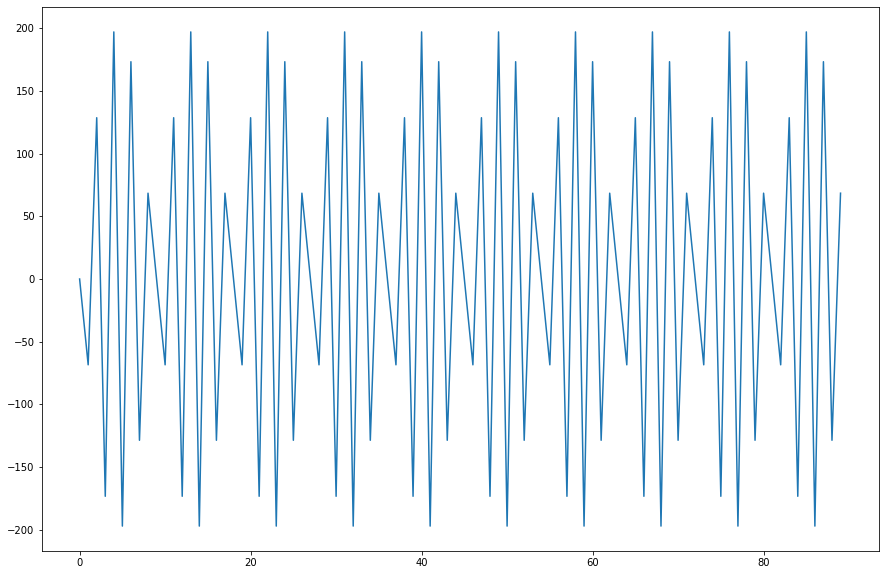

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))  # tego nie trzeba
plt.plot(vals)
plt.show()  # tego nie trzeba

In [ ]:
series = pd.Series(data=vals, index=ts)

In [ ]:
series

2021-01-01      0.000000
2021-01-02    -68.404029
2021-01-03    128.557522
2021-01-04   -173.205081
2021-01-05    196.961551
                 ...    
2021-03-27    196.961551
2021-03-28   -196.961551
2021-03-29    173.205081
2021-03-30   -128.557522
2021-03-31     68.404029
Freq: D, Length: 90, dtype: float64

In [ ]:
series.index.freq

<Day>

In [ ]:
series.name = 'my series'

In [ ]:
series

2021-01-01      0.000000
2021-01-02    -68.404029
2021-01-03    128.557522
2021-01-04   -173.205081
2021-01-05    196.961551
                 ...    
2021-03-27    196.961551
2021-03-28   -196.961551
2021-03-29    173.205081
2021-03-30   -128.557522
2021-03-31     68.404029
Freq: D, Name: my series, Length: 90, dtype: float64

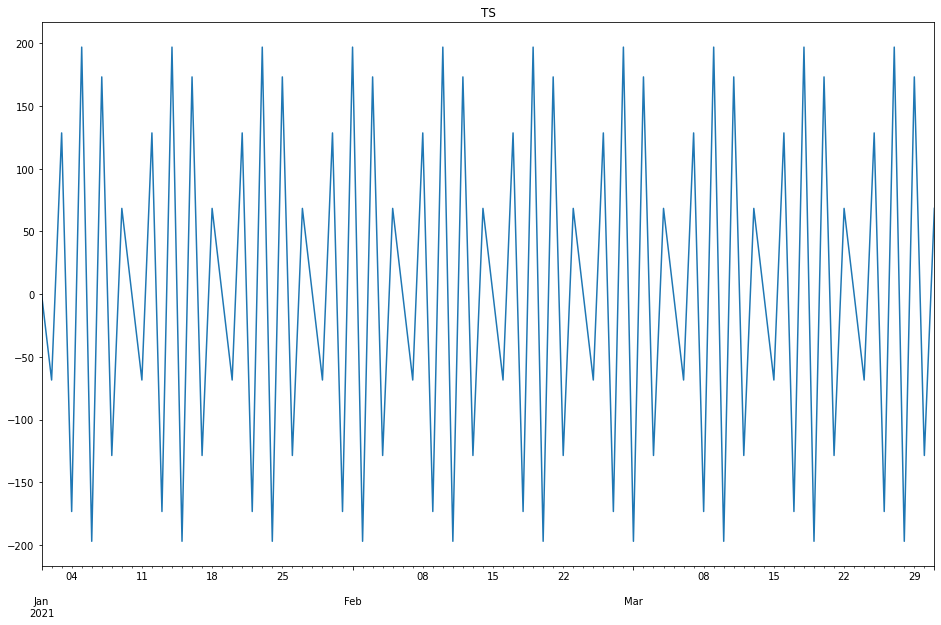

In [ ]:
series.plot(figsize=(16, 10), title='TS')

In [ ]:
def generate_trend(a, b, length):
  # trend = ax + b
  trend = a * np.arange(0, length) + b
  return trend

trendline = generate_trend(0.3, 0.1, 365)

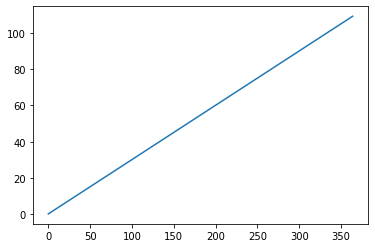

In [ ]:
plt.plot(trendline)

In [ ]:
def generate_seasonal(amplitude, season_length, freq=2, always_positive=True):
  ticks = np.arange(0, 1, 1/season_length)  # lepiej skorzystać z linspace
  vals = amplitude * np.sin(2*np.pi * freq * ticks)
  if always_positive:
    vals = vals + np.abs(np.min(vals))
  return vals

seasonal_wave = generate_seasonal(60, 365)

In [ ]:
plt.plot(seasonal_wave)

In [ ]:
def generate_random_noise(amp, length):
  noise = (2*np.random.rand(length) - 1) * amp
  return noise

nswave = generate_random_noise(8, len(trendline))

In [ ]:
plt.plot(nswave)

In [ ]:
timeseries = trendline + seasonal_wave + nswave
plt.plot(timeseries)

## Dekompozycja

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ts_index = pd.date_range('2021-01-01', periods=365, freq='D')
timeseries = pd.Series(timeseries, index=ts_index)

In [ ]:
decomposed = seasonal_decompose(timeseries)

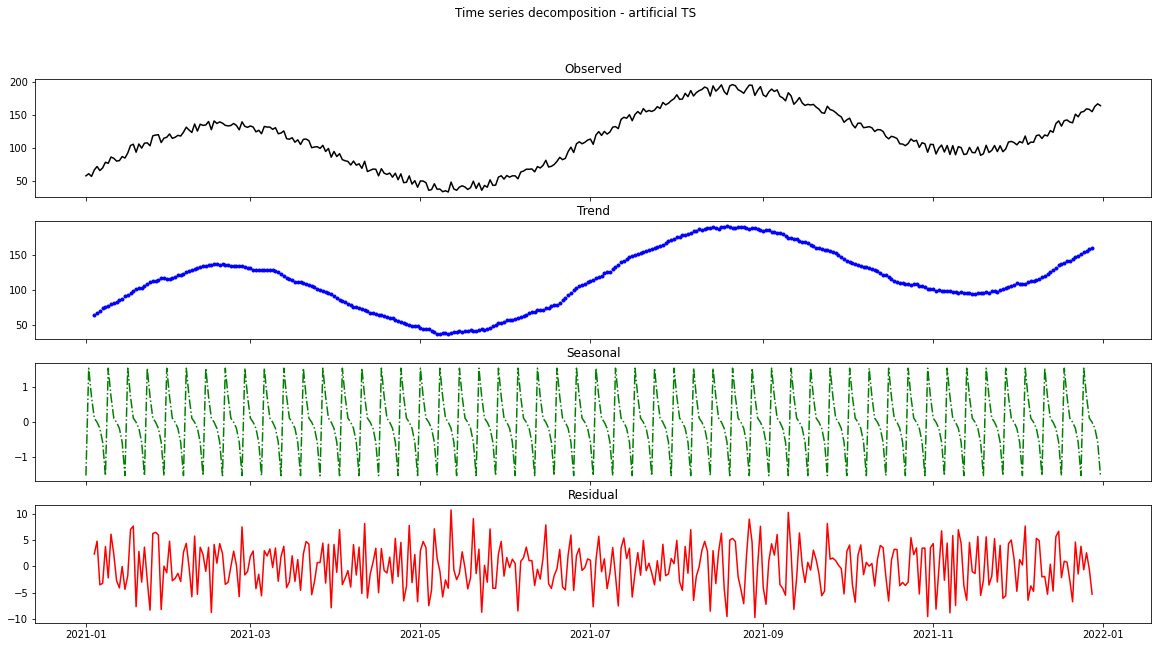

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20, 10))
fig.suptitle('Time series decomposition - artificial TS')
axes[0].plot(decomposed.observed, color='black')
axes[1].plot(decomposed.trend, '.b')
axes[2].plot(decomposed.seasonal, '-.g')
axes[3].plot(decomposed.resid, '-r')
axes[0].title.set_text('Observed')
axes[1].title.set_text('Trend')
axes[2].title.set_text('Seasonal')
axes[3].title.set_text('Residual')

In [ ]:
decomposed = seasonal_decompose(timeseries, freq=int(365/2))

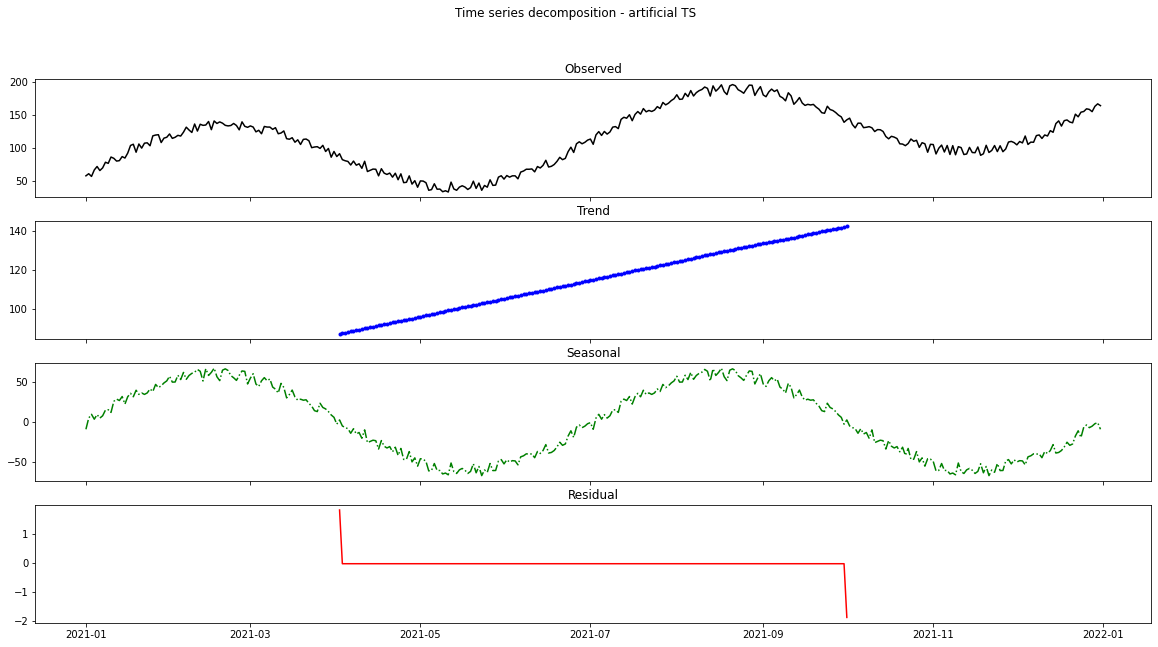

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20, 10))
fig.suptitle('Time series decomposition - artificial TS')
axes[0].plot(decomposed.observed, color='black')
axes[1].plot(decomposed.trend, '.b')
axes[2].plot(decomposed.seasonal, '-.g')
axes[3].plot(decomposed.resid, '-r')
axes[0].title.set_text('Observed')
axes[1].title.set_text('Trend')
axes[2].title.set_text('Seasonal')
axes[3].title.set_text('Residual')

In [ ]:
timeseries[-5:]

2021-12-27    158.855597
2021-12-28    155.450355
2021-12-29    163.511707
2021-12-30    167.331928
2021-12-31    164.572691
Freq: D, dtype: float64

In [ ]:
timeseries[-1]

164.57269066539612

In [ ]:
shifted = timeseries.shift(1)
shifted[-5:]

2021-12-27    159.774986
2021-12-28    158.855597
2021-12-29    155.450355
2021-12-30    163.511707
2021-12-31    167.331928
Freq: D, dtype: float64

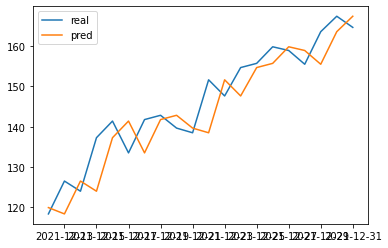

In [ ]:
plt.plot(timeseries[-20:])
plt.plot(shifted[-20:])
plt.legend(['real', 'pred'])

In [ ]:
# RMSE

# MEAN(SQRT((r - p)**2))

# RMSE <=> MAE <=> sMAPE symmetric Mean Absolute Percentage Error <=> CoV Coefficient of Variation

def calculate_mae(real, predicted):
  mae = np.mean(np.abs(real - predicted))
  return mae

mae_of_naive = calculate_mae(timeseries[-5:], shifted[-5:])
mae_of_naive

3.793088522603443

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  # Linear, Ridge, Lasso
from statsmodels.api import OLS

base = np.arange(0, len(timeseries[:-5]))

In [ ]:
levels = [1, 2, 3, 4]

features = PolynomialFeatures(degree=1)
transformed = features.fit_transform(base.reshape(-1, 1))
model = OLS(timeseries[:-5], transformed).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     47.30
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           2.72e-11
Time:                        17:12:59   Log-Likelihood:                -1839.2
No. Observations:                 360   AIC:                             3682.
Df Residuals:                     358   BIC:                             3690.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.0662      4.223     21.089      0.000      80.761      97.372
x1             0.1400      0.020      6.878      0.000       0.100       0.180
==============================================================================
Omnibus:                       87.442   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.582
Skew:                           0.039   Prob(JB):                     0.000251
Kurtosis:                       1.952   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

const    89.066196
x1        0.140041
dtype: float64

In [ ]:
l = len(timeseries[:-5])
pred_x = np.arange(l, l+5)
transformed = features.fit_transform(pred_x.reshape(-1, 1))
predicted = model.predict(transformed)
predicted

array([139.48092053, 139.62096144, 139.76100234, 139.90104324,
       140.04108414])

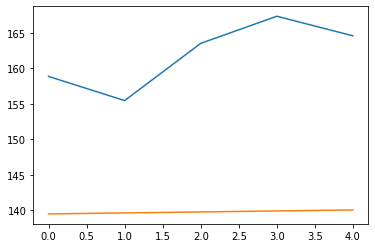

In [ ]:
plt.plot(timeseries[-5:].values)
plt.plot(predicted)

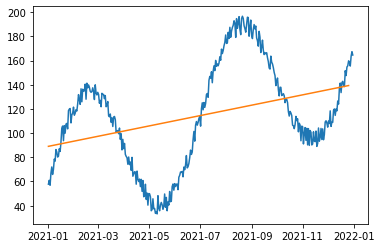

In [ ]:
plt.plot(timeseries)
plt.plot(model.fittedvalues)

In [ ]:
def poly_model(training, level, steps_ahead):
  base = np.arange(0, len(training))
  features = PolynomialFeatures(degree=level)
  transformed = features.fit_transform(base.reshape(-1, 1))
  model = OLS(training, transformed).fit()

  x_pred = np.arange(len(training), len(training) + steps_ahead)
  _transformed = features.fit_transform(x_pred.reshape((-1, 1)))
  predicted = model.predict(_transformed)

  new_index = pd.date_range(start=training.index[-1],
                            periods=steps_ahead + 1,
                            freq=training.index.freq)[1:]
  
  y_pred = pd.Series(data=predicted, index=new_index)
  y_pred.name = training.name
  y_pred.index.freq = training.index.freq

  return y_pred

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

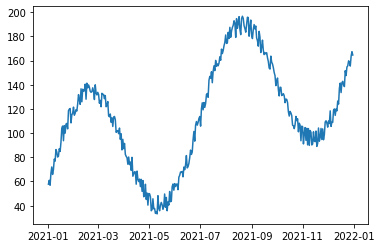

In [ ]:
plt.plot(timeseries)

In [ ]:
model = ExponentialSmoothing(timeseries[:-10], trend='add', freq='D')  # 'mul' | add -> yp + err

In [ ]:
predicted = model.fit()

In [ ]:
forecast = predicted.forecast(10)

In [ ]:
plt.plot(timeseries[-40:])
plt.plot(forecast)

In [ ]:
calculate_mae(timeseries[-10:], forecast)

2.9968082219296606

In [ ]:
# naive = timeseries.shift(1)[-10:]
naive_correct = pd.Series(np.ones(10)*timeseries[-10], index=timeseries.index[-10:])
naive_correct.index.freq = 'D'  # UWAGA, tu może być 'W' dla weekly
calculate_mae(timeseries[-10:], naive_correct)

7.098423619276088

## Zestawienie modeli

In [ ]:
# FB Prophet - dobra dokumentacja

test = timeseries[-10:]
train = timeseries[:-10]

# naiwny
naive_correct = pd.Series(np.ones(10)*test, index=test.index)

# holt-winters
model = ExponentialSmoothing(train, trend='mul', freq='D')
fitted = model.fit()
predicted = fitted.forecast(10)

# wielomianowe

levels = [1, 2]

polys = []
for lvl in levels:
  poly = poly_model(train[-5:], lvl, 10)
  polys.append(poly)

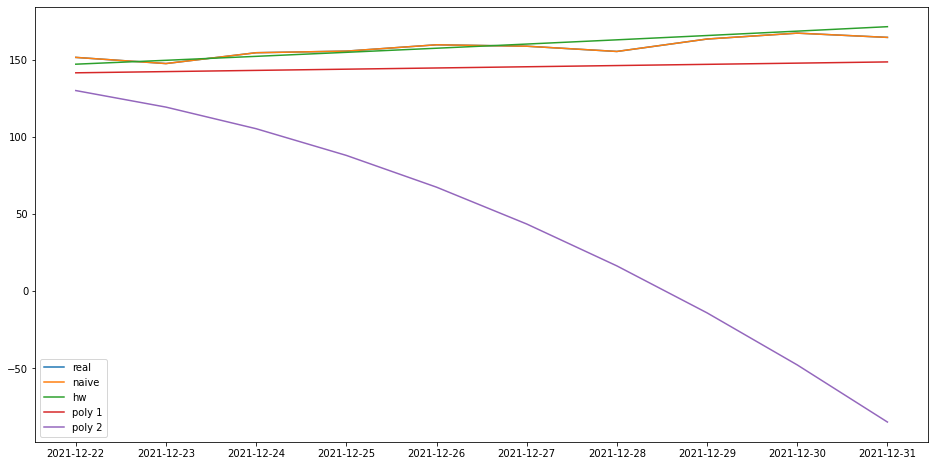

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(test)
plt.plot(naive_correct)
plt.plot(predicted)
plt.plot(polys[0])
plt.plot(polys[1])
plt.legend(['real', 'naive', 'hw', 'poly 1', 'poly 2'])
plt.show()

In [ ]:
mean_series = np.mean([naive_correct, predicted, polys[0], polys[1]], axis=0)
std_series = np.std([naive_correct, predicted, polys[0], polys[1]], axis=0)
upper_series = mean_series + 2*std_series
lower_series = mean_series - 2*std_series

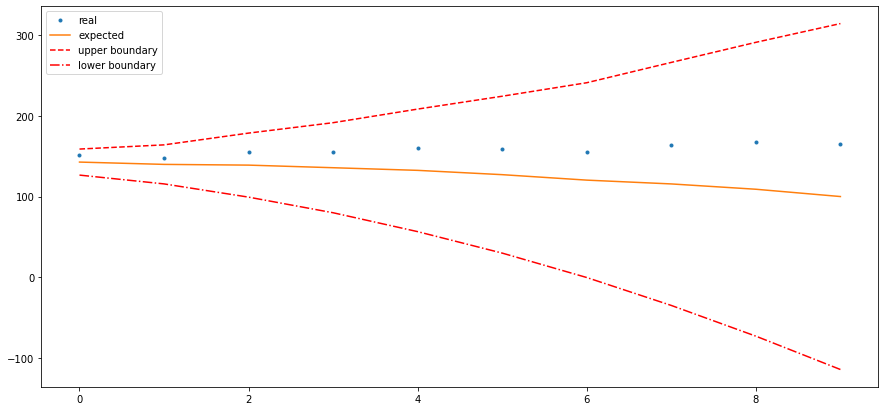

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test.values, '.')
plt.plot(mean_series)
plt.plot(upper_series, '--r')
plt.plot(lower_series, '-.r')
plt.legend(['real', 'expected', 'upper boundary', 'lower boundary'])